In [4]:
import numpy as np
from matplotlib import pyplot as plt

# Blatt 2

## Aufgabe 2.1 (Lagrange-Polynom)

In [5]:
stützstellen = [
    (0, 0),
    (1/2, 1),
    (np.sqrt(3)/2, 1),
] 

x_list = [s[0] for s in stützstellen]
y_list = [s[1] for s in stützstellen]

### 1.1 a) Vandermonde Matrix - Monomansatz

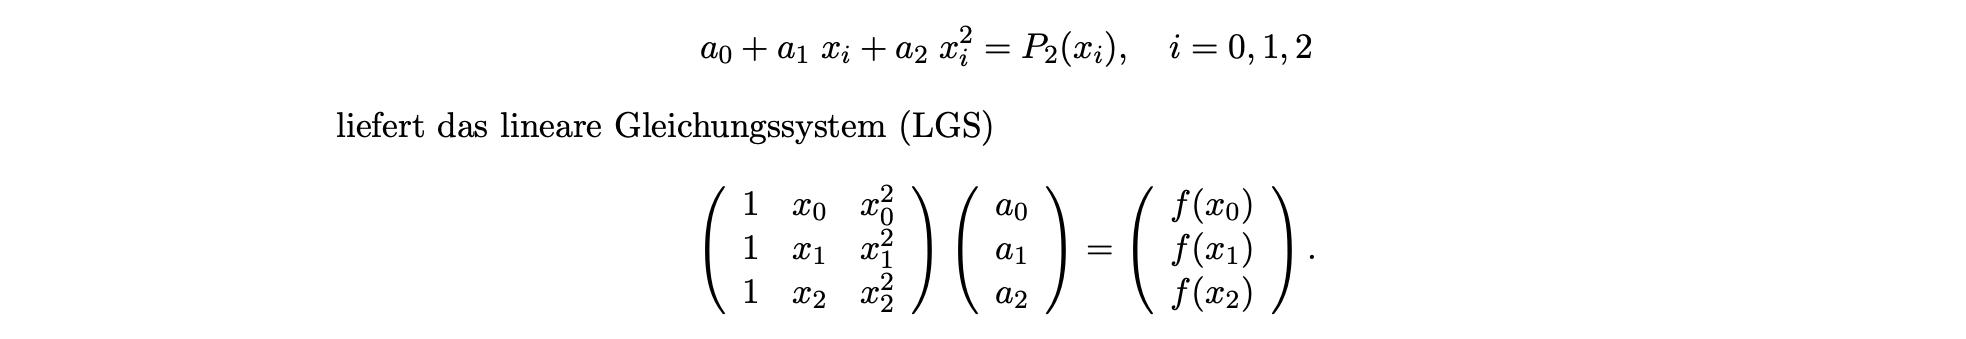

In [6]:

n = len(x_list)
vandermonde_matrix = [[x**i for i in range(n)] for x in x_list]
print("v:", vandermonde_matrix)
print("----------")
# v * a = y solve for a

a = np.linalg.solve(vandermonde_matrix, y_list)
a

v: [[1, 0, 0], [1.0, 0.5, 0.25], [1.0, 0.8660254037844386, 0.7499999999999999]]
----------


array([ 0.        ,  3.15470054, -2.30940108])

In [7]:
# Lösungsblatt 1a) Lösung sagt

a_lsg = [0, 4/(3-np.sqrt(3)), 4*(1-np.sqrt(3))/(3-np.sqrt(3))]
print("Lösungsblatt:", a_lsg)

# Ich hab berechnet:

a_my_calc = [0, 4/(3-np.sqrt(3)), 4-(8/(3-np.sqrt(3)))]
print("Meine Lösung:", a_my_calc)

Lösungsblatt: [0, 3.1547005383792515, -2.3094010767585025]
Meine Lösung: [0, 3.1547005383792515, -2.309401076758503]


**Monom Ansatz - Einsetzen**
Easy - einfach $a_i \cdot x^i, i = 0,1,2$

In [8]:
# erleichtert: f(x) = a_0 + a_1 * x + a_2 * x^2 + ... + a_n * x^n
f_von_x = np.poly1d(list(reversed(a)))
print(f_von_x)

        2
-2.309 x + 3.155 x


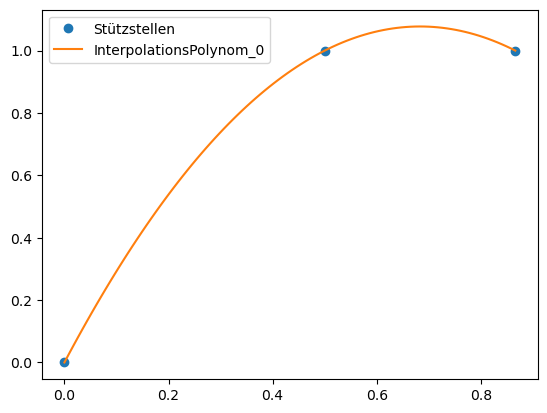

In [9]:
# plot

def plot_funktionen(f_list, x_list, y_list):
    if not isinstance(f_list, list):
        f_list = [f_list]
    plt.plot(x_list, y_list, 'o', label="Stützstellen")
    if min(x_list) == max(x_list):
        x = np.linspace(min(x_list)-1, max(x_list)+1, 100)
    else:
        x = np.linspace(min(x_list), max(x_list), 100)
    for i, f in enumerate(f_list):
        plt.plot(x, f(x), label=f"InterpolationsPolynom_{i}")
    plt.legend()
    plt.show()
    
plot_funktionen(f_von_x, x_list, y_list)

### 1.1 b) Lagrange Polynom

Basis: $$L_i(x) = \prod_{j=0, j \neq i}^n \frac{x-x_j}{x_i-x_j}$$

$$P_n(x) = \sum_{i=0}^n y_i \cdot L_i(x)$$

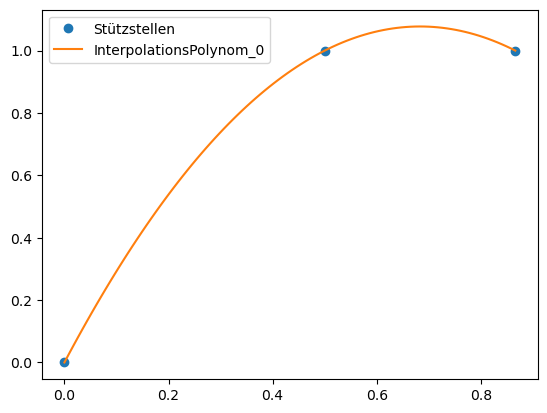

In [10]:
def L_i_von_x(i, n):
    def L_i(x):
        result = 1
        for j in range(n):
            if i != j:
                result *= (x - x_list[j]) / (x_list[i] - x_list[j])
        return result
    return L_i

def f_von_x_lagrange(x):
    result = 0
    for i in range(n):
        result += y_list[i] * L_i_von_x(i, n)(x)
    return result

plot_funktionen(f_von_x_lagrange, x_list, y_list)

### 1.1 c) Baricentrische Form des Lagrange Polynom

help function: $$\mu_i = \frac{\prod_{j=0, j \neq i}^n 1/(x_i-x_j)}{x-x_i}$$

polynom: $$P_n(x) = \frac{\sum_{i=0}^n y_i \cdot \mu_i}{\sum_{i=0}^n \mu_i}$$


### 1.1 d) Herleitung aus Lagrange

$$P_n(x) = \sum_{i=0}^n y_i \cdot L_i(x)$$

$$P_n(x) = \sum_{i=0}^n y_i \cdot \prod_{j=0, j \neq i}^n \frac{x-x_j}{x_i-x_j}$$

$$P_n(x) = \sum_{i=0}^n y_i \cdot \prod_{j=0, j \neq i}^n \frac{1}{x-x_j}{\prod_{j=0, j \neq i}^n (x_i-x_j)}$$

$$P_n(x) = \sum_{i=0}^n y_i \cdot \prod_{j=0, j \neq i}^n \frac{1}{x-x_j}\frac{{\prod_{j=0}^n (x_i-x_j)}}{(x_i-x_j)}$$

$$P_n(x) = \sum_{i=0}^n y_i \cdot \mu_i \cdot {\prod_{j=0}^n (x_i-x_j)}$$

$$P_n(x) = {\prod_{j=0}^n (x_i-x_j)} \cdot \sum_{i=0}^n y_i \cdot \mu_i $$

Im Spezialfall
$$y_i = 1 \forall i: {\prod_{j=0}^n (x_i-x_j)} = \sum_{i=0}^n \mu_i \Rightarrow P_n(x) = \frac{\sum_{i=0}^n y_i \mu_i}{\sum_{i=0}^n \mu_i}$$

In [11]:
def mu_i_von_x(i):
    def mu_i(x):
        x_i = x_list[i]
        result = 1/(x-x_i)
        for j, x_j in enumerate(x_list):
            if i != j:
                result /=(x_i - x_j)
        return result
    return mu_i

def f_von_x_baryzentrisch(x):
    result = 0
    for i in range(n):
        result += y_list[i] * mu_i_von_x(i)(x)
    for i in range(n):
        result /= mu_i_von_x(i)(x)
    return result

plot_funktion(f_von_x_baryzentrisch, x_list, y_list)

NameError: name 'plot_funktion' is not defined

## Newton Darstellung

- das Polynom in der Newton Darstellung vom höchst Grad $n$ hat $n+1$ Koeffizienten und interpoliert die ersten $n+1$ Stützstellen
- das Polynom ist rekursiv berechenbar
- Basis auch rekursiv berechenbar, da $N_i(x) = (x-x_{i-1}) \cdot N_{i-1}(x)$
    - -> wenn eine Stützstelle hinzukommt, muss nur ein neuer Koeffizient $a_n$ berechnet werden
<br>
<br>
- Newton Basis: $$N_i(x) = \prod_{j=0}^{i-1} (x-x_j)$$

- Newton Darstellung: $$P_n(x) = \sum_{i=0}^n a_i \cdot N_i(x)$$

### Wie berechnet man den Koeffizienten $a_i$?

$a_0$ ist trivial, da $N_0(x) = 1$ das leere Produkt ist, also und $P_0(x_0) = y_0$ also ist $$a_0 = y_0$$
damit ist $$P_0(x) = y_0$$
von hier aus rekursiv:
$$P_{n+1}(x) = P_{n}(x) + a_{n+1} \cdot N_{n+1}(x)$$

offensichtlich ist hierbei, dass $N_{n+1}(x) = 0$ für alle $x \in \{x_0, x_1, ..., x_n\}$, also werden weiterhin alle STützstellen $i = 0,1,...,n$ interpoliert

damit auch die Stützstelle $n+1$ interpoliert wird, muss der neue Summand in $P$ die Korrektur der Differenz $y_{n+1} - P_n(x_{n+1})$ liefern.

Also ist $$a_{n+1} \cdot N_{n+1}(x_{n+1}) = y_{n+1} - P_n(x_{n+1})$$

und damit $$a_{n+1} = \frac{y_{n+1} - P_n(x_{n+1})}{N_{n+1}(x_{n+1})}$$

So lässt sich die Newton Darstellung rekursiv berechnen. Es gibt aber noch einen schnelleren Wert mit dem Neville Schema. (Dividierte Differenzen)

## Neville Aitken

Wenn ein Polynom $P_{0,n-1}$ die Werte $y_{0}, y_{1}, ..., y_{n-1}$ interpoliert,
und ein anderes Polynom
$P_{1,n}$ die Werte $y_{1}, y_{2}, ..., y_{n}$ interpoliert, dann interpolieren beide Polynome alle Werte $y_{1}, y_{2}, ..., y_{n-1}$. Und um alle n+1 Werte zu interpolieren, muss ein $P_{0,n}$ gebildet werden, als Kombination der beiden Polynome $P_{0,n-1}$ und $P_{1,n}$.


dieses Bild nutzt links die notation $P_{k,j}$ wobei die Stützstellen $x_{k-j}, x_{k-j+1}, ..., x_{k}$ interpoliert werden. Das Schema rechts ist allgemein gültig.

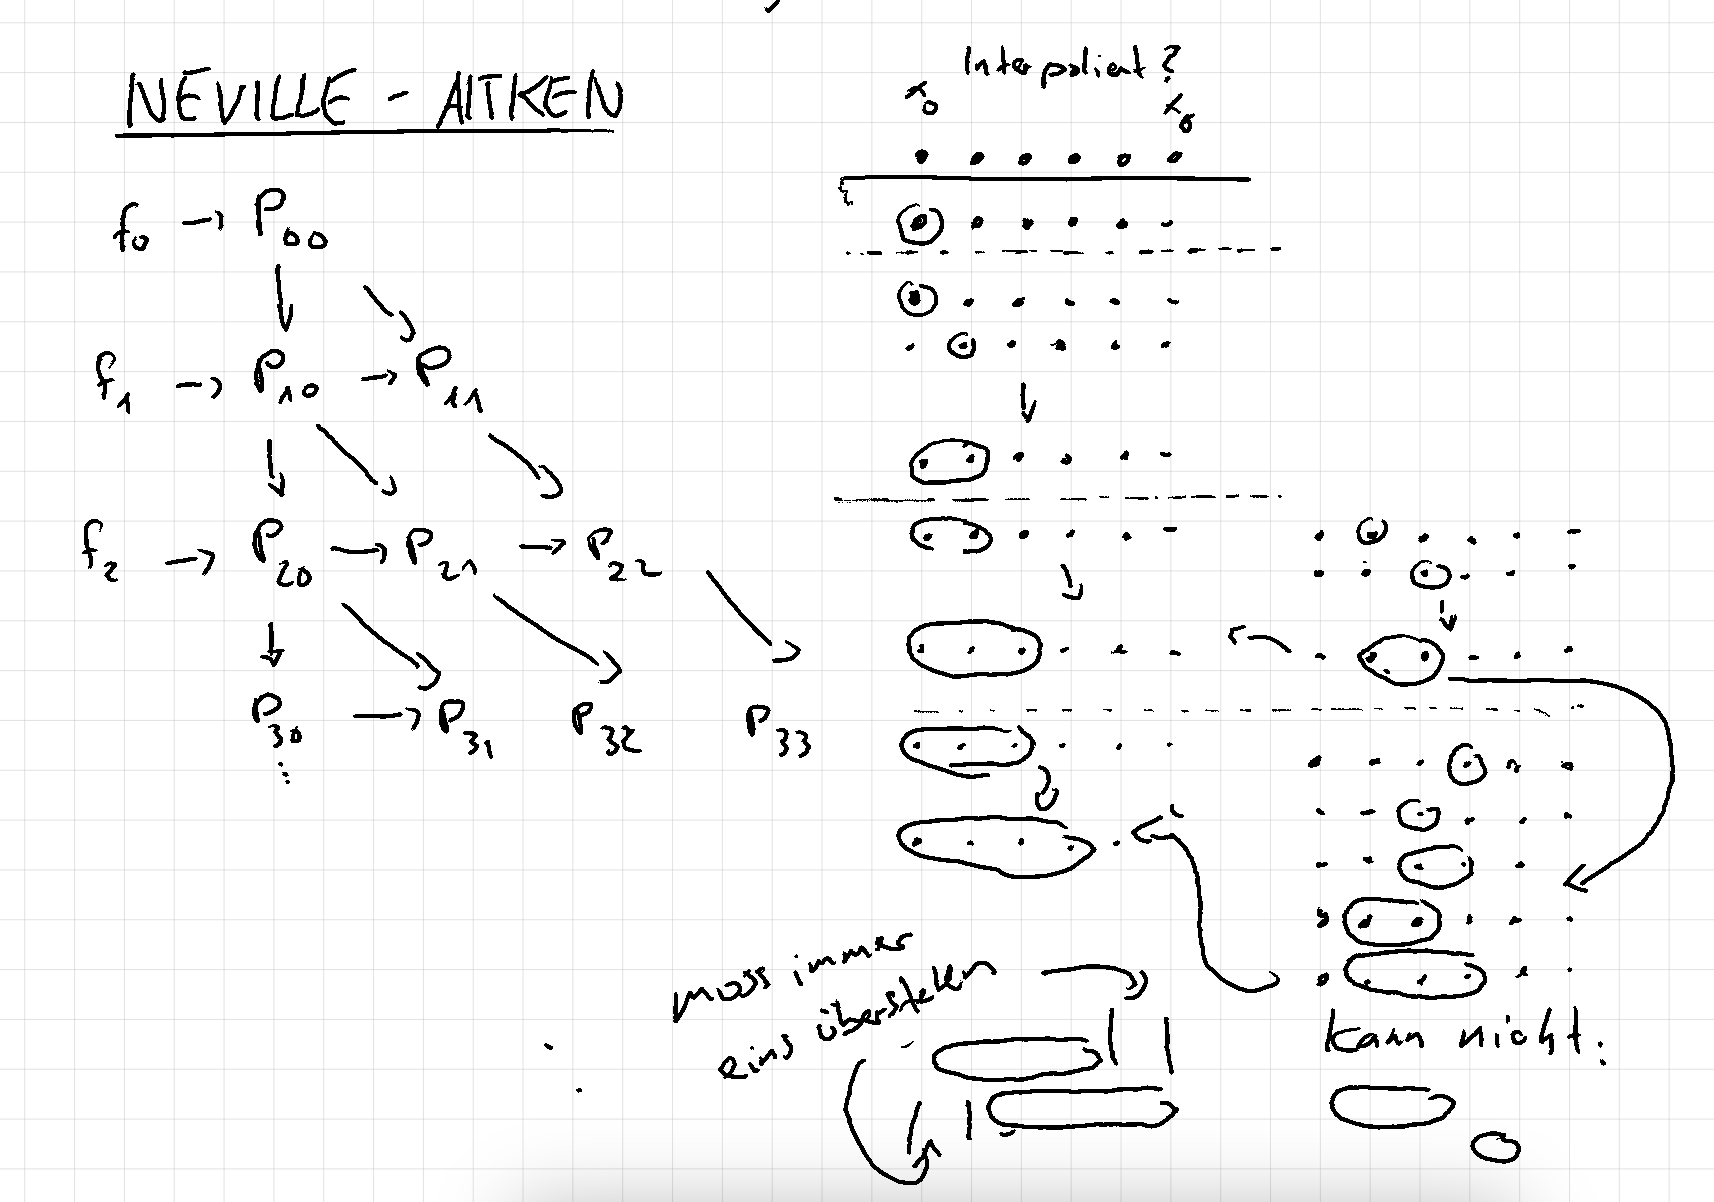

Dabei ist die Vorschrift:

$$P_{0,n} = P_{1,n} + \frac{x-x_n}{x_{0}-x_n} \cdot (P_{0,n-1} - P_{1,n}),$$

da $\frac{x-x_n}{x_{0}-x_n}$ genau dann 0 ist, wenn $x = x_n$ ist, und damit $P_{0,n}(x_n) = P_{1,n}$ und genau dann 1 ist, wenn $x = x_{0}$ ist, und damit $P_{k,j}(0) = P_{0,n-1}$.

Andere Darstellungen sind möglich, z.B.:

$$P_{0,n} = \frac{(x-x_n)}{(x_{0}-x_n)} \cdot P_{0,n-1} + \frac{(x_{0}-x)}{(x_0-x_n)} \cdot P_{1,n},$$

da $\frac{(x-x_n)}{(x_{0}-x_n)}$ + $\frac{(x_{0}-x)}{(x_{0}-x_n)} = \frac{(x-x_n) + (x_{0}-x)}{(x_{0}-x_n)} = \frac{x_{0}-x_n}{x_{0}-x_n} = 1$ in Summe immer gleich 1 sind und an den Stützstellen $x_n$ und $x_{0}$ jeweils genau wie benötigt $0$ bzw. $1$ annehmen. Diese Darstellung lässt sich auch vereinfachen zu:

$$P_{0,n} = \frac{(x-x_n) \cdot P_{0,n-1} - (x_{0}-x) \cdot P_{1,n}}{x_{0}-x_n}$$

## Dividierte Differenzen



Wie oben versprochen, lassen sich die Koeffizienten $a_i$ rekursiv berechnen. Dazu wird die Dividierte Differenz verwendet. Wir notieren die Koeffizienten $a$ als $[x_{0}, x_{1}, ..., x_n]f$, also als Liste der Stützstellen, die das Polynom oder teilpolynom mit $[x_{0}, x_{1}, ..., x_n]f$ als führenden Koeffizienten interpoliert.

Es gilt:

$$[x_{0}, x_{1}, ..., x_n]f = \frac{[x_{1}, x_{2}, ..., x_n]f - [x_{0}, x_{1}, ..., x_{n-1}]f}{x_n-x_{0}}$$

Beweis mittels Lemma von Aitken in der Form:

$$P_{0,n} = \frac{(x-x_n) \cdot P_{0,n-1} - (x_{0}-x) \cdot P_{1,n}}{x_{0}-x_n}$$

eingesetzt in die Newton Darstellung:

$$P_{0,n} = \frac{(x-x_n) \cdot (\sum_{i=0}^{n-1} [x_{0}, ..., x_{i}]f \cdot \prod_{l=0}^{i-1} (x-x_l)) - (x_{k-j}-x) \cdot (\sum_{i=1}^{n} [x_{1}, ..., x_{i}]f \cdot \prod_{l=1}^{i-1} (x-x_l))}{x_{0}-x_n}$$


$$P_{0,n} = (\sum_{i=0}^{n} [x_{0}, ..., x_{i}]f \cdot \prod_{l=0}^{i-1} (x-x_l)) = \frac{(x-x_n) \cdot (\sum_{i=0}^{n-1} [x_{0}, ..., x_{i}]f \cdot \prod_{l=0}^{i-1} (x-x_l)) - (x_{k-j}-x) \cdot (\sum_{i=1}^{n} [x_{1}, ..., x_{i}]f \cdot \prod_{l=1}^{i-1} (x-x_l))}{x_{0}-x_n}$$

wobei wir nur die Führenden Koeffizienten betrachten müsssen, da

$$(x-x_n) \cdot \prod_{l=0}^{n-2} (x-x_l) = \prod_{l=0}^{n-1} (x-x_l)$$
$$(x_{0}-x) \cdot \prod_{l=1}^{n-1} (x-x_l) = \prod_{l=0}^{n-1} (x-x_l)$$

also die gleiche Newton Basis erzeugt wird.

$$P_{0,n} = (\sum_{i=0}^{n} [x_{0}, ..., x_{i}]f \cdot \prod_{l=0}^{i-1} (x-x_l)) = \frac{(x-x_n) \cdot (\sum_{i=0}^{n-1} [x_{0}, ..., x_{i}]f \cdot \prod_{l=0}^{i-1} (x-x_l)) - (x_{k-j}-x) \cdot (\sum_{i=1}^{n} [x_{1}, ..., x_{i}]f \cdot \prod_{l=1}^{i-1} (x-x_l))}{x_{0}-x_n}$$

 



Dividierte Differenz:
$$[x_{0}, x_{1}, ..., x_n]f = \frac{[x_{1}, x_{2}, ..., x_n]f - [x_{0}, x_{1}, ..., x_{n-1}]f}{x_n-x_{0}}$$

## Aufgabe 2.2 (Dividierte Differenzen, Neville-Aitken)

In [17]:
runge_function = lambda x: 1/(1+25*x**2)

# generate 4 equidistant stützstellen

stützstellen = [
    (0, 2),
    (np.pi, 1),
    (2*np.pi, 2),
]

x_list = [s[0] for s in stützstellen]
y_list = [s[1] for s in stützstellen]

Spalte $j$ der dividierten Differenzen Tabelle, ist die Liste der Führenden Koeffizienten der Polynome $P$, die $j+1$ Stützstellen interpolieren. (wobei wir mit $j=0$ beginnen zu zählen)

### 2.2 a) Dividierte Differenzen Tabelle

In [13]:
def get_dividierte_differenzen_matrix_für(stützstellen, initial_matrix=None):

    if initial_matrix is None:

        dividierte_differenzen_matrix = np.empty((len(stützstellen), len(stützstellen)))
        dividierte_differenzen_matrix[:] = np.nan

        # erste Spalte einfüllen mit [x_i]f = f(x_i)

        for i, (x_i, y_i) in enumerate(stützstellen):
            dividierte_differenzen_matrix[i][0] = y_i
        dividierte_differenzen_matrix

    else: 
        dividierte_differenzen_matrix = initial_matrix

    # rekursive Vorschrift anwenden

    for j in range(1, len(stützstellen)):
        for i in range(j, len(stützstellen)):
            # falls noch nicht berechnet (nan)
            if np.isnan(dividierte_differenzen_matrix[i][j]):
                x_i = stützstellen[i][0]
                x_i_minus_j = stützstellen[i-j][0]
                dividierte_differenzen_matrix[i][j] = (dividierte_differenzen_matrix[i][j-1] - dividierte_differenzen_matrix[i-1][j-1]) / (x_i - x_i_minus_j)           
    return dividierte_differenzen_matrix
        
get_dividierte_differenzen_matrix_für(stützstellen)

array([[ 2. ,  nan,  nan,  nan],
       [ 1. , -1. ,  nan,  nan],
       [ 2. ,  0.5,  0.5,  nan],
       [ 4. ,  2. ,  0.5,  0. ]])

In [14]:
# Newton Polynom unter Verwendung der dividierten Differenzen

def newton_basis(x, i, stützstellen):
    result = 1
    _x_list = [s[0] for s in stützstellen]
    j = 0
    while j < i:
        result *= (x - _x_list[j])
        j += 1
    return result

def f_von_x_newton(x, stützstellen, dds):
    result = 0
    for i, dd in enumerate(dds):
        result += dd * newton_basis(x, i, stützstellen)
    return result

for x in x_list:
    print(f"f({x}) = {f_von_x_newton(x, stützstellen, np.diagonal(get_dividierte_differenzen_matrix_für(stützstellen)))}")
    
    

f(0) = 2.0
f(1) = 1.0
f(3) = 2.0
f(4) = 4.0


In dieser Aufgabe ist das eindeutige Interpolationspolynom vom höchstgrad n-1 mit n = 4 stützstellen, tatsächlich nur von grad 2, da die letzte dividierte differenz 0 ist

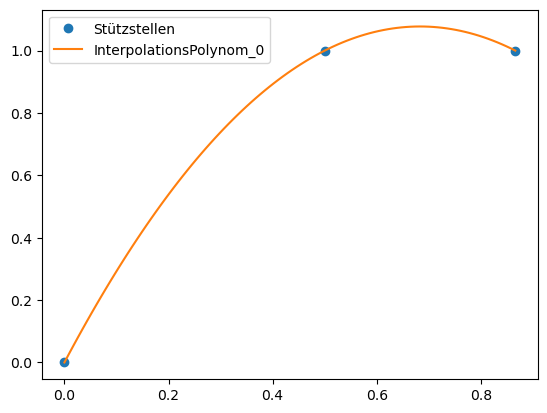

In [ ]:
# plot
_f_von_x_newton = lambda x: f_von_x_newton(x, stützstellen, np.diagonal(get_dividierte_differenzen_matrix_für(stützstellen)))
plot_funktionen(_f_von_x_newton, x_list, y_list)

### 2.2 b) Neville Schema

Direktes ausrechnen der Funktionswerte des Polynoms $P_{k,j}$ dass alle Werte von $i$  mit $k-j \leq i \leq k$ interpoliert, mittels Aitken Schema:

In [39]:
def aitken_rekursions_vorschrift(p_k_j_minus_1, p_k_minus_1_j_minus_1, x_k, x_k_minus_j, x):
    return (p_k_j_minus_1 * (x - x_k_minus_j) - p_k_minus_1_j_minus_1 * (x - x_k)) / (x_k - x_k_minus_j)

def p_k_j_at_x_mit_aitken(k, j, x):
    if j == 0:
        p_k_j_at_x =  stützstellen[k-j][1]
    else:
        x_k = stützstellen[k][0]
        x_k_minus_j = stützstellen[k-j][0]
        p_k_j_minus_1 = p_k_j_at_x_mit_aitken(k, j-1, x)
        p_k_minus_1_j_minus_1 = p_k_j_at_x_mit_aitken(k-1, j-1, x)
        p_k_j_at_x = aitken_rekursions_vorschrift(p_k_j_minus_1, p_k_minus_1_j_minus_1, x_k, x_k_minus_j, x)
    # print(f"p_{k}_{j}({x}) = {p_k_j_at_x}")
    return p_k_j_at_x


Aufgabe fragt nach $p(2)$ mit $p \isin P_3$ also vom Höchstgrad 3, 4 Stützstellen interpoliert, also $P_{0,3}$

1.25


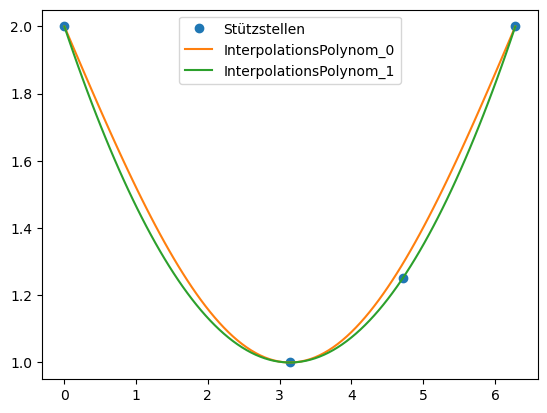

Maximaler Fehler: 0.056009583795272766
Abgeschätzter Maximaler Fehler: 1.9890531139002197
Meine Berechnung: 1.9890535764376795


In [56]:
_f = lambda x: 2 - np.sin(x / 2)

k = 2
j = 2
_x = np.pi * 3/2 
assert k >= 2, "j can not be greater than k"
assert k < len(stützstellen), "not enough stützstellen"

result_at_x = p_k_j_at_x_mit_aitken(k, j, _x)
print(result_at_x)
plot_funktionen([_f, lambda x: p_k_j_at_x_mit_aitken(k, j, x)], x_list + [_x], y_list + [result_at_x])

maximaler_fehler = np.max([np.abs(_f(x) - p_k_j_at_x_mit_aitken(k, j, x)) for x in np.linspace(0, 2*np.pi, 1000)])
print(f"Maximaler Fehler: {maximaler_fehler}")

abgeschätzter_maximaler_fehler = 1/6 * np.max([np.abs(x*(x-np.pi)*(x - 2* np.pi)) for x in np.linspace(0, 2*np.pi, 1000)])
print(f"Abgeschätzter Maximaler Fehler: {abgeschätzter_maximaler_fehler}")

meine_berechnung =  1/6 * np.abs((np.pi**3 / (3 * np.sqrt(3)) - np.pi**3 / np.sqrt(3)))
print(f"Meine Berechnung: {meine_berechnung}")

# Blatt 3

## Aufgabe 3.1 (Newton-Darstellung und Interpolationsfehler)

In [ ]:
def nicht_polyniomiale_funktion(x):
    return np.log(x+2)

stützstellen = [
    (x, nicht_polyniomiale_funktion(x)) for x in range(4)
]

x_list = [s[0] for s in stützstellen]
y_list = [s[1] for s in stützstellen]

### 3.1 a) Dividierte Differenzen

In [ ]:
get_dividierte_differenzen_matrix_für(stützstellen)

array([[ 0.69314718,         nan,         nan,         nan],
       [ 1.09861229,  0.40546511,         nan,         nan],
       [ 1.38629436,  0.28768207, -0.05889152,         nan],
       [ 1.60943791,  0.22314355, -0.03226926,  0.00887409]])

### 3.2 b) Verschiedene Newton Polynome aus den dividierten Differenzen

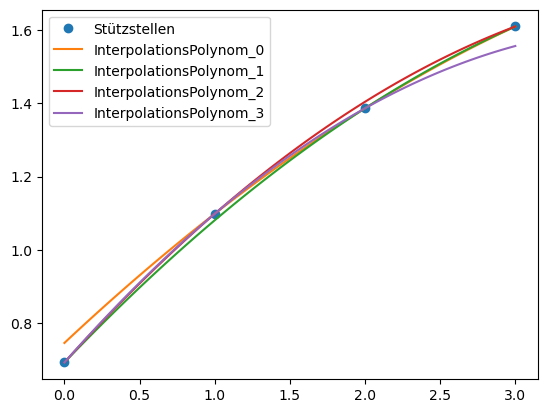

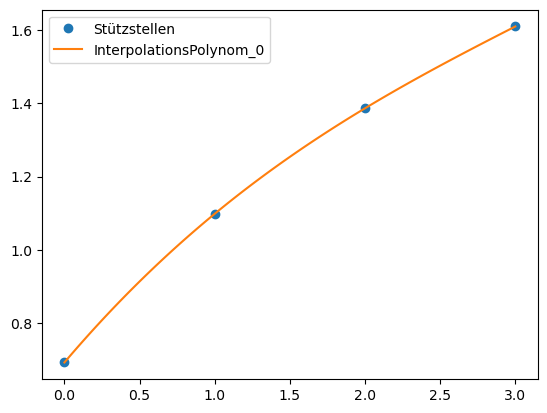

In [ ]:
# 4 Newton Polynome vom Grad 2 basierend auf 3 der 4 Stützstellen
p_2_list = []
for k in range(4):
    stützstellen_ohne_k = stützstellen[:k] + stützstellen[k+1:]
    dds = np.diagonal(get_dividierte_differenzen_matrix_für(stützstellen_ohne_k))
    p_2_list.append(lambda x, szs=stützstellen_ohne_k, dds=dds: f_von_x_newton(x, szs, dds))

plot_funktionen(p_2_list, x_list, y_list)

# p_3 ist trivial und einfach das komplette Polynom
p_3 = lambda x: f_von_x_newton(x, stützstellen, np.diagonal(get_dividierte_differenzen_matrix_für(stützstellen)))
plot_funktionen(p_3, x_list, y_list)
    

## Hermite-Genocchi-Formel

Es gilt die folgende Eigenschaft für die dividierten Differenzen:
    
$$[x_0, ..., x_n]f = \frac{f^{(n)}(\tau)}{n!}, \tau \in [x_0, x_n]$$

wobei für $n = 0, x_0 = x_n$ folgt:

$$[x_0]f = f(x_0)$$

## Interpolationsfehler

Um den Interpolationsfehler eines Polynoms an einer Stelle $x \notin Stützstellen$ zu berechnen, kann man die Newoton Form $p_{n+1}$ berechnen und der neue Summand $a_{n+1} \cdot N_{n+1}(x)$ ist der Interpolationsfehler, da gilt:

$$p_{n+1}(x) = p_{n}(x) + a_{n+1} \cdot N_{n+1}(x)$$
$$f(x) - p_{n}(x) = f(x) - (p_{n+1}(x) - a_{n+1} \cdot N_{n+1}(x))$$
$$f(x) - p_{n}(x) = f(x) - p_{n+1}(x) + a_{n+1} \cdot N_{n+1}(x)$$
$$f(x) - p_{n+1}(x) = 0, \text{da $p_{n+1}$ das Polynom ist, dass die Stützstellen interpoliert}$$
$$f(x) - p_{n}(x) = a_{n+1} \cdot N_{n+1}(x)$$

Für die Interpolationsfehlerschranke, also den maximalen Fehler, der bei der Interpolation an einer Stelle $x \notin Stützstellen$ auftritt, gilt folglich:

$$|f(x) - p_{n}(x)| \leq |a_{n+1} \cdot N_{n+1}(x)|$$
$$|f(x) - p_{n}(x)| \leq |a_{n+1}| \cdot |\prod_{i=0}^{n} (x-x_i)|$$

wobei wir a_{n+1} nicht mit den Dividierten Differenzen berechnen können, und uns der Hermit-Genocchi Formel bedienen müssen:

$$a_{n+1} = \frac{f^{(n+1)}(\tau)}{(n+1)!}, \tau \in [x_0, x_n]$$

$$|f(x) - p_{n}(x)| \leq \frac{1}{(n+1)!}|f^{(n+1)}(\tau) \max \limits_{\tau \in [x_0, x_n]}| \cdot |\prod_{i=0}^{n} (x-x_i)|$$

### 3.1 c) Interpolationsfehlerschranken, der vier Polynome vom Grad 2

- Lösung auf Papier
- Hier vergleich mit den Fehlern die oben zB beobachtet werden können


In [ ]:
# per hand hab ich errechnet, dass die 2 verschiedenen Fehlerschranken bestehen aus:

eins_durch_n_fakultät = [1/6, 1/6]
max_in_nter_ableitung = [1/4, 1/4]
max_in_newton_basis = [6, (4+np.sqrt(7))*(4+np.sqrt(7)-3)*(4+np.sqrt(7)-9)/27]


print(f"maximum in newton basis: {max_in_newton_basis}")

# zeilenweise multiplikation der 3 Vektoren
fehler_schranken = [abs(a*b*c) for a, b, c in zip(eins_durch_n_fakultät, max_in_nter_ableitung, max_in_newton_basis)]

print(f"fehler_schranken: {fehler_schranken}")

maximum in newton basis: [6, -2.1126117909223803]
fehler_schranken: [0.25, 0.08802549128843251]


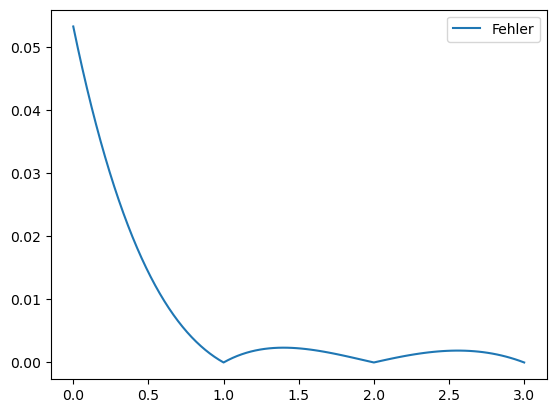

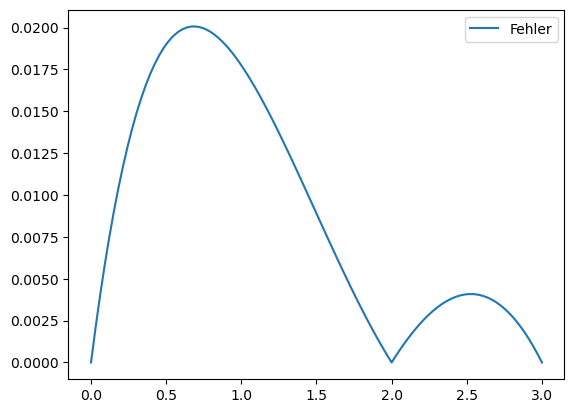

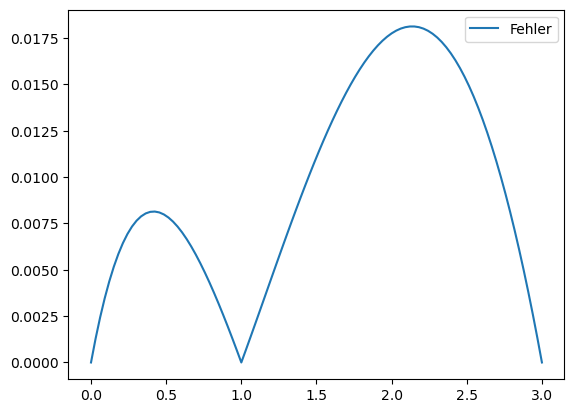

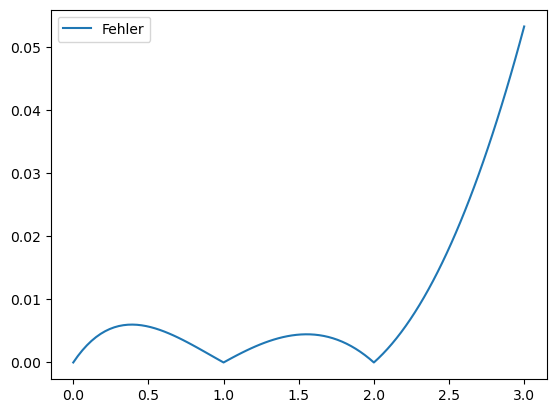

In [ ]:
x_test = np.linspace(0, 3, 100)
f_correct = nicht_polyniomiale_funktion(x_test)
for p in p_2_list:
    plt.plot(x_test, abs(f_correct - p(x_test)), label="Fehler")
    plt.legend()
    plt.show()

## Tschebyscheff Knoten

Offensichtlich wird der Interpolationsfehler maßgeblich von dem Betrag Newton Basis bestimmt. Deshalb ist es sinnvoll, die Stützstellen so zu wählen, dass die Newton Basis möglichst klein wird. Die Tschebyscheff Knoten sind die Stützstellen, die so gewählt sind, dass das Maximum der Newton Basis auf dem Intervall $[a,b]$ minimal wird.

Für das Intervall $[-1,1]$ sind die Tschebyscheff Knoten:

$$x_i = \cos \left(\frac{2i+1}{2n+2} \pi \right), i = 0,1,...,n$$

optimal.

## Aufgabe 3.2 (Tschebycheff-Polynome)

### 3.2 a) Orthogonalität der Tschebycheff-Polynome

// TODO:

### 3.2 b) Skizzieren des Knotenpolynom zu äquidistanten Stützstellen und den durch die Tschebyscheff Knoten gegebenen Stützstellen

0.5000000000000001 ist das Betragmaximum des tschebycheff polynoms
0.5 ist die Abschätzung für das Betragmaximum des tschebycheff polynoms


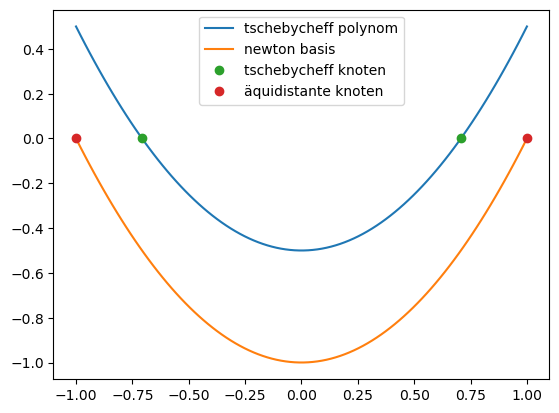

In [ ]:
n_plus_1 = 2
n = n_plus_1 - 1

def tschebyscheff_knoten(n):
    return [np.cos((2*i+1)/(2*n+2)*np.pi) for i in range(n+1)]

def _tschebycheff_polynom(xs):
    return [np.prod([x - x_i for x_i in tschebyscheff_knoten(n)]) for x in xs]

äquidistante_knoten = np.linspace(-1, 1, n+1)

def _newton_basis(xs):
    return [np.prod([x - x_i for x_i in äquidistante_knoten]) for x in xs]

xs = np.linspace(-1, 1, 100)

print(np.max(np.abs(_tschebycheff_polynom(xs))), "ist das Betragmaximum des tschebycheff polynoms")

print(2**(-n), "ist die Abschätzung für das Betragmaximum des tschebycheff polynoms")

plt.plot(xs, _tschebycheff_polynom(xs), label="tschebycheff polynom")
plt.plot(xs, _newton_basis(xs), label="newton basis")

plt.plot(tschebyscheff_knoten(n), [0 for _ in tschebyscheff_knoten(n)], 'o', label="tschebycheff knoten")
plt.plot(äquidistante_knoten, [0 for _ in äquidistante_knoten], 'o', label="äquidistante knoten")

plt.legend()
plt.show()


# Blatt 4

## Aufgabe 4.1 (Fehler für Hermite-Interpolation und Tschebycheff-Knoten)

### 4.1 a) Berechnung des Hermite-Interpolationspolynoms und vergleich mit Taylor Polynom 3. Grades

$$f(x) = exp(-x)$$
$$f^{(l)}(0) = f^{(l)}_3(0), \quad  l\isin \{0, ..., 3\}$$

- 4 Bedingungen
- Kubisches Interpolationspolynom

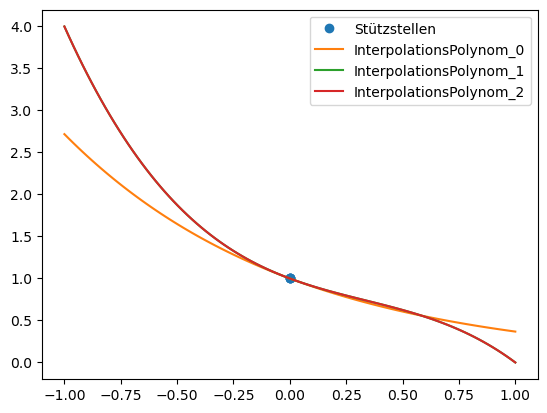

In [ ]:
# initialise dividierte differenzen matrix

def _aufg_4_1a_n_te_ableitung_an_x(x, n):
    koeffizient = 1 if n % 2 == 0 else -1
    return koeffizient * np.exp(-x)


n = 3

x_list = [0]
n_ableitungen_an_x_betrachten = [n+1]

def get_hermite_stützstellen(x_list, n_ableitungen_an_x_betrachten, ableitungens_funktionen):
    x_stützstellen = []
    for x, n in zip(x_list, n_ableitungen_an_x_betrachten):
        x_stützstellen = x_stützstellen + [x] * (n)
    
    stützstellen = []
    for sz in x_stützstellen:
        stützstellen.append((sz, ableitungens_funktionen(sz, 0)))
    return stützstellen

def get_hermite_initial_matrix(stützstellen, n_ableitungen_an_x_betrachten, ableitungens_funktionen):

    matrix_setup = np.empty((len(stützstellen), len(stützstellen)))
    matrix_setup[:] = np.nan

    row_offset = 0
    for x, n_ableitungen in zip(x_list, n_ableitungen_an_x_betrachten):
        for j in range(n_ableitungen):
            for i in range(j + row_offset, n_ableitungen + row_offset):
                matrix_setup[i][j] = ableitungens_funktionen(x, j)
        row_offset += n_ableitungen
        
    return matrix_setup
    
def get_dividierte_differenzen_matrix_hermite_version(x_list, n_ableitungen_an_x_betrachten, ableitungens_funktionen):
    stützstellen = get_hermite_stützstellen(x_list, n_ableitungen_an_x_betrachten, ableitungens_funktionen)
    initial_matrix = get_hermite_initial_matrix(stützstellen, n_ableitungen_an_x_betrachten, ableitungens_funktionen)
    dds = get_dividierte_differenzen_matrix_für(stützstellen, initial_matrix)
    print(dds)
    return dds

stützstellen = get_hermite_stützstellen(x_list, n_ableitungen_an_x_betrachten, _aufg_4_1a_n_te_ableitung_an_x)

initial_matrix = get_hermite_initial_matrix(stützstellen, n_ableitungen_an_x_betrachten, _aufg_4_1a_n_te_ableitung_an_x)

hermite_polynom = lambda x: f_von_x_newton(x, stützstellen, np.diagonal(initial_matrix))
# da die gesamte Matrix für die Entwickluingsstelle 0 berechnet wurde, ist das hermite polynom auch ein taylor polynom
taylor_polynom = lambda x: f_von_x_newton(x, stützstellen, np.diagonal(initial_matrix))

_f_von_x = lambda x, n=0: _aufg_4_1a_n_te_ableitung_an_x(x, n)
# plot
plot_funktionen([_f_von_x, taylor_polynom, hermite_polynom], [s[0] for s in stützstellen], [s[1] for s in stützstellen])

### 4.1 b) Berechnung des kubischen Hermite-Interpolationspolynoms

$$ f(x) = sin(\pi x/2) + cos(\pi x/2)$$
$$ f^{(l)}(x_i) = f^{(l)}_3(x_i), \quad  l \isin\{0, ..., 1\} \quad \textrm{and} \quad x_i \isin \{-1, 1\}$$

- 4 Bedingungen
- Kubisches Interpolationspolynom

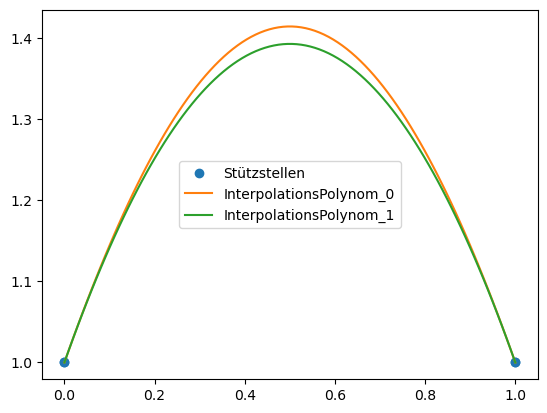

In [ ]:
n = 1
x_list = [0, 1]
n_ableitungen_an_x_betrachten = [n+1, n+1]

_aufg_4_1b_f_von_x = lambda x: np.sin(np.pi * x / 2) + np.cos(np.pi * x / 2)

def _aufg_4_1b_n_te_ableitung_an_x(x, n):
    koeffizient = 0.5**n * np.pi**n
    if n % 4 == 0:
        return (np.sin(np.pi * x / 2) + np.cos(np.pi * x / 2)) * koeffizient
    if n - 1 % 4 == 0:
        return (np.cos(np.pi * x / 2) - np.sin(np.pi * x / 2)) * koeffizient
    if n - 2 % 4 == 0:
        return (-np.sin(np.pi * x / 2) - np.cos(np.pi * x / 2)) * koeffizient
    if n - 3 % 4 == 0:
        return (-np.cos(np.pi * x / 2) + np.sin(np.pi * x / 2)) * koeffizient
    

stützstellen = get_hermite_stützstellen(x_list, n_ableitungen_an_x_betrachten, _aufg_4_1b_n_te_ableitung_an_x)

initial_matrix = get_hermite_initial_matrix(stützstellen, n_ableitungen_an_x_betrachten, _aufg_4_1b_n_te_ableitung_an_x)

hermite_polynom = lambda x: f_von_x_newton(x, stützstellen, np.diagonal(get_dividierte_differenzen_matrix_für(stützstellen, initial_matrix)))

# plot
plot_funktionen([_aufg_4_1b_f_von_x, hermite_polynom], [s[0] for s in stützstellen], [s[1] for s in stützstellen])


### 4.1 c) Fehlerschranke des Polynoms aus b) abschätzen

### 4.1 d) Wie viele Tschebyscheff Knoten werden benötigt um $f(x)$ aus b) auf dem Intervall [-1,1] mit einem Fehler von $\epsilon(x) < 1/20$ zu interpolieren?

- Hinweis

$$ | \prod_{i=0}^{n} (x-x_i) | \leq \frac{1}{2^n}$$

$ | f^{n+1} | $ darf grob abgescätzt werden mit Sinus und Kosinus als 1

## Splines

Die Knotenpolynome oszilieren sehr stark, selbst mit Tschebyscheff Knoten tritt bei einigen Funktionen wir z.B. der Runge Funktion ein sehr großer Fehler auf. 

In [ ]:
import latexify

@latexify.function
def runge_function(x):
    return 1/(1+25*x**2)

runge_function

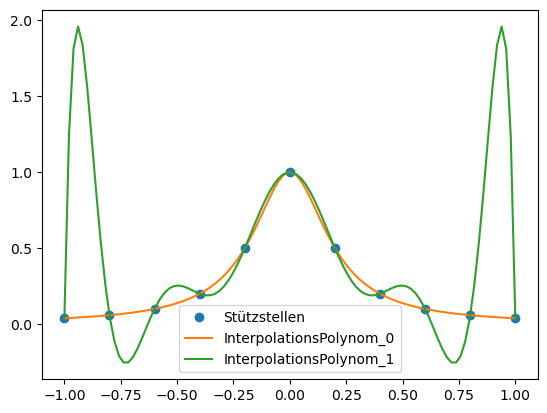

In [ ]:
stützstellen = [(x, runge_function(x)) for x in np.linspace(-1, 1, 11)]

_newton_polynom = lambda x: f_von_x_newton(x, stützstellen, np.diagonal(get_dividierte_differenzen_matrix_für(stützstellen)))

# plot
plot_funktionen([runge_function, _newton_polynom], [s[0] for s in stützstellen], [s[1] for s in stützstellen])

Daher, interpolieren wir jedes Stück von $x_{j-1}$ bis $x_{j}$ zwischen den Stützstellen einzeln mit einem Polynom $s_j(x)$, wobei an den Stützstellen bestimmte Bedingungen erfüllt sein müssen. Diese Bedingungen sind für Splines der driiten Ordnung:

Damit $s_j(x)$ ein Polynom vom Grad 3 ist, müssen bei $n+1$ stützstellen die $n$ Splines insgesamt $4n$ bedingungen haben

- $s_j(x)$ muss $f$ in $x_{j-1}$ und $x_{j}$ interpolieren -> 2 Bedingungen pro Spline
- $s_j(x)$ muss in $x_{j-1}$und $x_{j}$ stetig differenzierbar sein -> 1 Bedingung pro Spline (mit ausnahme des ersten)
- $s_j(x)$ muss in $x_{j-1}$ und $x_{j}$ zweimal stetig differenzierbar sein -> 1 Bedingung pro Spline (mit ausnahme des ersten)

Fehlen also noch 2 Bedingungen, die wir frei wählen können. Wir wählen:


- $s_1''(x_0) = 0 \quad und \quad s_n''(x_{n}) = 0$ für natürliche Splines
- $s_1'(x_0) = f'(x_0) \quad und \quad s_n'(x_{n}) = f'(x_{n})$ für vollständige Splines
- $s_1^{(i)}(x_0) = s_n^{(i)}(x_{n}), \quad i \isin \{0, 1, 2\}$ für periodische Splines, wobei natürlich schon durch die vorgegebenen Daten f(a) = f(b) erfüllt sein muss.

## Aufgabe 4.2 (Spline-Interpolation)

### 4.2 a) Berechnung des natürlichen kubischen Splines

$$ f(x) = sin(\pi x/2) + cos(\pi x/2), \quad x \isin [-1, 1]$$
$$ x_j = -1 + \frac{2j}{3}, \quad j \isin {0, ..., 3}$$

## Momentenmethode

Wenn wir die unbekannten zweiten Ableitungen der Splines an der Stützstellen finden, so sind auch schon die Splines, per zweifacher Integration bestimmt:

$$M_j = s''(x_j), \quad j \isin \{0, ..., n\}$$

da die zweiteableitung stetig sein soll, also $s_j''(x_{j-1}) = s''_{j-1}(x_{j-1})$ gilt, können wir $s_j''$ als Gerade schreiben.

Notiz:

- $s_j''(x_{j-1})$ ist am linken Rand des Splines $j$
- $s_j-1''(x_{j-1})$ ist am rechten Rand des Splines $j-1$, da der spline $j$ immer von $x_{j-1}$ bis $x_{j}$ geht

$s_j''$ als geraden Gleichung:

$$s_j''(x) = M_{j-1} + \frac{M_j - M_{j-1}}{h_j}(x-x_{j-1}), \quad mit \quad h_j = x_j - x_{j-1}$$
1. Integration:

$$s_j'(x) = B_j + M_{j-1}(x-x_{j-1}) + \frac{M_j - M_{j-1}}{2h_j}(x-x_{j-1})^2, \quad \text{mit $B_j$ als Integrationskonstante}$$

2. Integration:

$$s_j(x) = A_j + B_j(x-x_{j-1}) + \frac{M_{j-1}}{2}(x-x_{j-1})^2 + \frac{M_j - M_{j-1}}{6h_j}(x-x_{j-1})^3, \quad \text{mit $A_j$ als Integrationskonstante}$$

Wir setzen ein für die linke und rechte Stützstelle:

- $s_j(x_{j-1})$ alle $(x-x_{j-1})$ Terme werden null, es bleibt $s_j(x_{j-1}) = A_j$ was per definition bedeutet $A_j = f(x_{j-1})$

- $$s_j(x_j) = A_j + B_j h_j + \frac{M_{j-1}}{2} h_j ^2 + \frac{M_j - M_{j-1}}{6h_j} h_j^3

Erster Term ist schon nach $A_j$ aufgelöst, wir lösen den zweiten nach $B_j$ auf:


$$B_j = \frac{s_j(x_j) - A_j}{h_j} - \frac{M_{j-1}}{2} h_j - \frac{M_j - M_{j-1}}{6h_j} h_j^2$$

per definition ist $s_j(x_j) = f(x_j)$, also:
$$ \begin{align}
B_j = \frac{f(x_j) - f(x_{j-1})}{h_j} - \frac{M_{j-1}}{2} h_j - \frac{M_j - M_{j-1}}{6} h_j \\
B_j = \frac{f(x_j) - f(x_{j-1})}{h_j} - \frac{3M_{j-1}}{6} h_j - \frac{M_j - M_{j-1}}{6} h_j \\
B_j = \frac{f(x_j) - f(x_{j-1})}{h_j} - \frac{h_j}{6} (M_j + 2M_{j-1}) \\

\end{align}$$


Wir haben bisher die Stetigkeit der zweiten Ableitung an den Stützstellen ausgenutzt, nun nutzen wir die Stetigkeit der ersten Ableitung an den Stützstellen aus:

$$s_j'(x_{j-1}) = s_{j-1}'(x_{j-1})$$

$s_j'(x_j)$ erhielten wir bereits oben:

$$s_j'(x_j) = B_j + M_{j-1}(x_j-x_{j-1}) + \frac{M_j - M_{j-1}}{2h_j}(x_j-x_{j-1})^2 = s_{j+1}'(x_j)$$

Wir setzen für $x$ jeweils $x_j$ ein und erhalten:

$$\begin{aligned}

s_j'(x_j) & = B_j + M_{j-1}h_j + \frac{M_j - M_{j-1}}{2h_j}h_j^2, \quad \text{mit der Stetigkeitsforderung} \\
= s_{j+1}'(x_j) & , \quad \text{definiert als:} \\
s_{j+1}'(x_j) & = B_{j+1} + M_{j}(x_j-x_{j-1+1}) + \frac{M_{j+1} - M_{j}}{2h_{j+1}}(x_j-x_{j-1+1})^2 = B_{j+1} + 0 + 0 \\

\text{also mit $s_j'(x_j) = B_{j+1}$:} \\

 \Rightarrow B_{j+1} & = B_j + M_{j-1}h_j + \frac{M_j - M_{j-1}}{2h_j}h_{j}^2 \\
 & = B_j + \frac{M_j + M_{j-1}}{2} h_{j}  \\
\end{aligned}$$
$$

In diese Gleichung setzen wir nun die Gleichung für $B_j$ ein:

$$\begin{aligned}
B_{j+1} & = B_j + \frac{M_j + M_{j-1}}{2} h_j \\
B_{j+1} & = \frac{f(x_j) - f(x_{j-1})}{h_j} - \frac{h_j}{6} (M_j + 2M_{j-1}) + \frac{M_j + M_{j-1}}{2} h_j \\
\end{aligned}$$

Und für $B_{j+1}$ ebenfalls eingesetzt, um die $B$ zu eliminieren:

$$ \frac{f(x_{j+1}) - f(x_{j})}{h_{j+1}} - \frac{h_{j+1}}{6} (M_{j+1} + 2M_{j}) = \frac{f(x_j) - f(x_{j-1})}{h_j} - \frac{h_j}{6} (M_j + 2M_{j-1}) + \frac{M_j + M_{j-1}}{2} h_j $$

umgestellt:

$$\begin{align}
 6 \frac{f(x_{j+1}) - f(x_{j})}{h_{j+1}} - 6 \frac{f(x_j) - f(x_{j-1})}{h_j} & = h_{j+1} (M_{j+1} + 2M_{j}) - h_j (M_j + 2M_{j-1}) + 3(M_j + M_{j-1}) h_j \\

6 \frac{f(x_{j+1}) - f(x_{j})}{h_{j+1}} - 6 \frac{f(x_j) - f(x_{j-1})}{h_j} & = h_j M_{j-1} + 2 (h_{j} + h_{j+1}) M_j + h_{j+1} M_{j+1} \\
\end{align}$$

mit $h_j + h_{j+1} = k_k $ und $ 6 (\frac{f(x_{j+1}) - f(x_{j})}{h_{j+1}} -  \frac{f(x_j) - f(x_{j-1})}{h_j}) = d_j$:
 lässt sich für die Randwerte $M_0 = 0 $ und $M_n = 0$ folgendes Lineares Gleichungssystem aufstellen:

$$\begin{pmatrix}

2k_1 & h_2  \\
h_2 & 2k_2 & h_3 &  \\
  &   & \ddots & \ddots & \ddots \\
  &   &   & k_{n-2} & 2k & h_{n-1} \\
  &   &   &   & h_{n-1} & 2k_{n-1} \\

\end{pmatrix} \begin{pmatrix}

M_1 \\
M_2 \\
\vdots \\
M_{n-2} \\
M_{n-1} 

\end{pmatrix} = \begin{pmatrix}

d_1 \\
d_2 \\
\vdots \\
d_{n-2} \\
d_{n-1}

\end{pmatrix}$$


### 4.2 b) Verwenden von vollständigem kubischen Spline für Fehlerabschätzung mittels Skript Seite 59

Im Skript steht, dass für den Vollständigen kubischen Spline gilt:

$$|f(x) - s(x)| \leq \frac{5}{384} h^4 ||f^{(4)}||_{\infty, [a,b]}$$

wobei $h$ der größte Abstand zweier Stützstellen ist. Äquivalent zu folgender Notation:

$$|f(x) - s(x)| \leq \frac{5}{384} h^4 \max \limits_{x \isin [a,b]} |f^{(4)}(x)|$$


## Aufgabe 4.3 (Interpolation)

# Blatt 5

## Aufgabe 5.1 (Splinte-Interpolation mit Hilfe der Kardinalsplines)

### 5.1.

# Numerische Integration



## Quadraturformeln

- Beispiele sind z.B.: Trapezregel, Mittelpunktregel, Simpsonregel, Newton-Cotes Formeln

## Aufgabe 5.2 (Integration von Differentialgleichungen)

Als differential Gleichung kenne ich z.B.:

y'(t) = a y(t)

dies lässt sich auch für mehrere Differentialgleichungen notieren, sei $y(t) \isin \mathbb{R}^n$:

$$y'(t) = A y(t)$$

in der Aufgabendstellung ist $A$ gegeben:

$$A = \begin{pmatrix}
2 & 1 \\
1 & 4
\end{pmatrix}$$

das Übungsblatt schreibt dies um mit einem Integral:

$$y(t+h) = y(t) + \int_{t}^{t+h} A y(s) ds$$

Das System sei diskretisiert für Stützstellen $t_0, t_1, ..., t_n$ mit den Abständen $h_i = t_{i+1} - t_i$. Die Integralgleichungen werden dann sukzessive im Intervall $[t_i, t_{i+1}]$ gelöst:

### 5.2 a) Herleitung der Newton-Cotes-Formel der Ordnung $n = 0$

- Skript Seite 75

## Newton Cotes Formeln

Die Newton Cotes Formeln berechnen die $n$ Gewichte $\lambda i$ und ergeben sich aus der Forderung, dass die Quadraturformel mit n Stützstellen exakt ist für Polynome vom Grad $n$...

wobei man das Polynom $p \isin \mathbb{P}_n$ wohl in der Lagrange Darstellung nehmen könnte und die Lagrange Basisfunktionen einzeln integrieren könnte ?!

D.h. für alle $L_i$ muss gelten:

$$ I(L_i) = \hat{I}(L_i) = \int_{a}^{b} L_i(t) dt = (b-a) \sum_{j=0}^{n} \lambda_j L_i(t_j) $$ 

umgestellt nach $\lambda_i$:

$$ \lambda_i = \frac{1}{b-a} \int_{a}^{b} L_i(t) dt = \frac{1}{b-a} \int_{a}^{b} \prod_{j=0, j \neq i}^{n} \frac{t-t_j}{t_i-t_j} dt $$




### 5.2 b) Komponentenweise Quadratur mittels Newton-Cotes-Formel

### 5.3 c) Komponentenweise Quadratur mittels Trapezregel

# Lineare Gleichungssysteme

$$Ax = b$$

wenn $det A \neq 0$ so gibt es ein $A^{-1}$ mit $x = A^{-1}b $

Mittels Cramerscher Regel viel zu teuer

Cramersche Regel:

$$x_j = \frac{det(\text{$A$ mit $b$ in der $j_{ten}$ spalte})}{det A}$$



In [28]:
import numpy as np


# Crameres regel sehr ineffizient:

In [29]:
# Solve with cramers rule

def replace_column_i_in_matrix(matrix_A, vector_b, i):
    assert matrix_A.shape[0] == vector_b.shape[0], "matrix and vector must have same number of rows"
    return np.concatenate((matrix_A[:, :i], vector_b.reshape(-1, 1), matrix_A[:, i+1:]), axis=1)
    
solve_with_cramers_rule = lambda matrix_A, vector_b: [np.linalg.det(replace_column_i_in_matrix(matrix_A, vector_b, i)) / np.linalg.det(matrix_A) for i in range(matrix_A.shape[1])]


In [37]:
import time

for n in [50, 100, 200]:
    matrix_n_n = np.random.rand(n, n)
    b_vector = np.random.rand(n)

    # using cramers rule
    start = time.time()
    solve_with_cramers_rule(matrix_n_n, b_vector)
    end = time.time()
    print(f"Für n = {n} dauert es {end - start} Sekunden mit Cramers Regel")

    # using inveres
    start = time.time()
    np.linalg.inv(matrix_n_n) @ b_vector
    end = time.time()
    print(f"Für n = {n} dauert es {end - start} Sekunden mit Inverse")

    # using numpy.linalg.solve
    start = time.time()
    np.linalg.solve(matrix_n_n, b_vector)
    end = time.time()
    print(f"Für n = {n} dauert es {end - start} Sekunden mit numpy.linalg.solve")

Für n = 50 dauert es 0.005552053451538086 Sekunden mit Cramers Regel
Für n = 50 dauert es 0.0003268718719482422 Sekunden mit Inverse
Für n = 50 dauert es 6.413459777832031e-05 Sekunden mit numpy.linalg.solve
Für n = 100 dauert es 0.03811001777648926 Sekunden mit Cramers Regel
Für n = 100 dauert es 0.0009310245513916016 Sekunden mit Inverse
Für n = 100 dauert es 0.000308990478515625 Sekunden mit numpy.linalg.solve
Für n = 200 dauert es 0.25017499923706055 Sekunden mit Cramers Regel
Für n = 200 dauert es 0.0012638568878173828 Sekunden mit Inverse
Für n = 200 dauert es 0.0006661415100097656 Sekunden mit numpy.linalg.solve


## LR Zerlegung

In [44]:
matrix_to_split = np.array([
    [2, 1, 8],
    [4, 5, 2],
    [7, 6, 3]
])

# Frobenius Matrix
matrix_L_1 = np.array([
    [1, 0, 0],
    [-4/2, 1, 0],
    [-7/2, 0, 1],
])

# bzw allgemeiner

matrix_L_1 = np.array([
    [1, 0, 0],
    [-matrix_to_split[1][0]/matrix_to_split[0][0], 1, 0],
    [-matrix_to_split[2][0]/matrix_to_split[0][0], 0, 1],
])

# multiply 
matrix_to_split_1 = matrix_L_1 @ matrix_to_split
matrix_to_split_1

array([[  2. ,   1. ,   8. ],
       [  0. ,   3. , -14. ],
       [  0. ,   2.5, -25. ]])

In [47]:
# Frobenius Matrix

matrix_L_2 = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, -5/6, 1],
])

# bzw. allgemeiner

matrix_L_2 = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, -matrix_to_split_1[2][1]/matrix_to_split_1[1][1], 1],
])

matrix_to_split_2 = matrix_L_2 @ matrix_to_split_1
matrix_to_split_2

array([[  2.        ,   1.        ,   8.        ],
       [  0.        ,   3.        , -14.        ],
       [  0.        ,   0.        , -13.33333333]])

## LR - Zerlegung, ergibt sich aus den Gauß Eliminationsschritten mit den Frobenius Matrizen

$$A = L \cdot R$$

$$ R = L_1 \cdot L_2 \cdot ... \cdot L_n \cdot A$$

$$ R = L^{-1} \cdot A$$

$$ \Rightarrow L = L_1^{-1} \cdot L_2^{-1} \cdot ... \cdot L_n^{-1}$$



Wobei das inverse von $L_i$, $L_i^{-1}$ einfach zu berechnen ist, da man einfach die Vorzeichen außerhalb der Diagonalen umkehren muss.

Das Produkt aller $L_i^{-1}$ ist dann $L^{-1}$ und ebenfalls einfach zu berechnen:

In [49]:
# print inverse of L matrix

print(matrix_L_1)
print(np.linalg.inv(matrix_L_1))

print("----------")

print(matrix_L_2)
print(np.linalg.inv(matrix_L_2))



[[ 1.   0.   0. ]
 [-2.   1.   0. ]
 [-3.5  0.   1. ]]
[[ 1.  -0.  -0. ]
 [ 2.   1.   0. ]
 [ 3.5  0.   1. ]]
----------
[[ 1.          0.          0.        ]
 [ 0.          1.          0.        ]
 [ 0.         -0.83333333  1.        ]]
[[1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.83333333 1.        ]]


In [68]:
matrix_L = np.linalg.inv(matrix_L_1) @ np.linalg.inv(matrix_L_2)
print(matrix_L)
print("-----> L^-1:")
matrix_L_inv = np.linalg.inv(matrix_L)
print(matrix_L_inv)
print("-----> R:")
print(matrix_to_split_2)
print("-----> L * R:")
print(matrix_L @ matrix_to_split_2)
print("-----> L^-1 * A = R?:")
matrix_R = matrix_L_inv @ matrix_to_split
# round to 3 decimals
matrix_R = np.round(matrix_R, 3)
matrix_R

[[1.         0.         0.        ]
 [2.         1.         0.        ]
 [3.5        0.83333333 1.        ]]
-----> L^-1:
[[ 1.00000000e+00 -9.51619735e-17  0.00000000e+00]
 [-2.00000000e+00  1.00000000e+00  0.00000000e+00]
 [-1.83333333e+00 -8.33333333e-01  1.00000000e+00]]
-----> R:
[[  2.           1.           8.        ]
 [  0.           3.         -14.        ]
 [  0.           0.         -13.33333333]]
-----> L * R:
[[2. 1. 8.]
 [4. 5. 2.]
 [7. 6. 3.]]
-----> L^-1 * A = R?:


array([[  2.   ,   1.   ,   8.   ],
       [  0.   ,   3.   , -14.   ],
       [  0.   ,   0.   , -13.333]])

## Mit Permutation

Die Permutation $P$ ist eine Matrix, die die Zeilen von $A$ vertauscht, so dass die Pivot Elemente auf der Diagonalen stehen.
Jede Zeile von $P$ hat eine 1, alle anderen Einträge sind 0. Keine zwei Zeilen haben eine 1 in der gleichen Spalte.
Die Permutation holt dann in die Spalte $j$ die Zeile $i$ an deren Stelle in P eine 1 steht.
Die Permutation ist so zu wählen, dass alle einträge der Frobenius Matrizen $L_i$ betragsmäßig kleiner gleich 1 sind.

In [70]:
print(matrix_to_split)

[[2 1 8]
 [4 5 2]
 [7 6 3]]


In [77]:
permutation_matrix = np.array([
    [0, 0, 1],
    [0, 1, 0],
    [1, 0, 0],
])

matrix_to_split_tilde = permutation_matrix @ matrix_to_split
matrix_to_split_tilde

array([[7, 6, 3],
       [4, 5, 2],
       [2, 1, 8]])

Jetzt sind die L Matrizen folgendermaßen:

In [82]:
from fractions import Fraction

print("-----> A~:")
print(matrix_to_split_tilde)

matrix_L_1 = np.array([
    [1, 0, 0],
    [- Fraction(matrix_to_split_tilde[1][0], matrix_to_split_tilde[0][0]), 1, 0],
    [- Fraction(matrix_to_split_tilde[2][0], matrix_to_split_tilde[0][0]), 0, 1],
])

print(matrix_L_1)

matrix_to_split_1 = matrix_L_1 @ matrix_to_split_tilde

print("-----> A^(1):")
print(matrix_to_split_1)

print("--------------------")

matrix_L_2 = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, - Fraction(matrix_to_split_1[2][1], matrix_to_split_1[1][1]), 1],
])

print(matrix_L_2)

matrix_to_split_2 = matrix_L_2 @ matrix_to_split_1

print("-----> A^(2):")
print(matrix_to_split_2)

-----> A~:
[[7 6 3]
 [4 5 2]
 [2 1 8]]
[[1 0 0]
 [Fraction(-4, 7) 1 0]
 [Fraction(-2, 7) 0 1]]
-----> A^(1):
[[7 6 3]
 [Fraction(0, 1) Fraction(11, 7) Fraction(2, 7)]
 [Fraction(0, 1) Fraction(-5, 7) Fraction(50, 7)]]
--------------------
[[1 0 0]
 [0 1 0]
 [0 Fraction(5, 11) 1]]
-----> A^(2):
[[Fraction(7, 1) Fraction(6, 1) Fraction(3, 1)]
 [Fraction(0, 1) Fraction(11, 7) Fraction(2, 7)]
 [Fraction(0, 1) Fraction(0, 1) Fraction(80, 11)]]
